In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, TimeDistributed, Dropout, Activation

 

In [3]:
import yfinance as fyf
from pandas_datareader import data as pdr
fyf.pdr_override() # <-- Here is the fix
import datetime

In [4]:
# Set label
stocks = ["AAPL"] # If you want to grab multiple stocks add more labels to this list

# Set start and end dates
start = datetime.datetime(2017, 1, 1)
end   = datetime.datetime(2018, 3, 14)

# Grab data
data = pdr.get_data_yahoo(stocks, start = start, end = end)

[*********************100%***********************]  1 of 1 completed


In [5]:
data.shape
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,27.257641,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,27.227139,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.365591,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.670671,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.924122,134247600


In [6]:
df=data['Close']
df.shape

(300,)

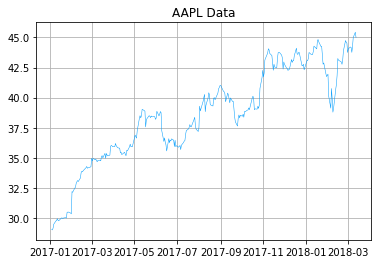

In [7]:
plt.title("AAPL Data")
plt.plot(df, color="#039dfc", linewidth=0.5)
plt.grid()
plt.show()

In [8]:
# Settings
epochs = 12; batch_size = 1; lstm_neuron_number = 110

# Get the number of rows to train the model on 80% of the data
npdataset = df.values
training_data_length = math.ceil(len(npdataset) * 0.8)
 

In [9]:

npdataset=npdataset.reshape(-1, 1)

In [10]:
mmscaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = mmscaler.fit_transform(npdataset)

In [11]:
 # Create a scaled training data set
train_data = scaled_data[0:training_data_length, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []
trainingdatasize = len(train_data)
for i in range(lstm_neuron_number, trainingdatasize):
    x_train.append(
        train_data[i - lstm_neuron_number : i, 0]
    )  # contains lstm_neuron_number values 0-lstm_neuron_number
    y_train.append(train_data[i, 0])  # contains all other values

# Convert the x_train and y_train to numpy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)


In [12]:
y_train.shape
x_train.shape

(130, 110)

In [13]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print("x_tain.shape: " + str(x_train.shape) + " -- y_tain.shape: " + str(y_train.shape))

# Configure and compile the neural network model
model1 = Sequential()
model1.add(
    LSTM(lstm_neuron_number, return_sequences=False, input_shape=(x_train.shape[1], 1))
)
model1.add(Dense(1))
model1.compile(optimizer="adam", loss="mean_squared_error")

# Create the test data set
test_data = scaled_data[training_data_length - lstm_neuron_number :, :]

# Create the data sets x_test and y_test
x_test = []
y_test = npdataset[training_data_length:, :]
for i in range(lstm_neuron_number, len(test_data)):
    x_test.append(test_data[i - lstm_neuron_number : i, 0])

x_tain.shape: (130, 110, 1) -- y_tain.shape: (130,)


In [14]:
# Train the model
history = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/12
130/130 [==============================] - 4s 19ms/step - loss: 0.0167
Epoch 2/12
130/130 [==============================] - 2s 18ms/step - loss: 0.0041
Epoch 3/12
130/130 [==============================] - 2s 17ms/step - loss: 0.0036
Epoch 4/12
130/130 [==============================] - 2s 17ms/step - loss: 0.0035
Epoch 5/12
130/130 [==============================] - 2s 17ms/step - loss: 0.0032
Epoch 6/12
130/130 [==============================] - 2s 17ms/step - loss: 0.0031
Epoch 7/12
130/130 [==============================] - 2s 18ms/step - loss: 0.0028
Epoch 8/12
130/130 [==============================] - 2s 17ms/step - loss: 0.0025
Epoch 9/12
130/130 [==============================] - 2s 18ms/step - loss: 0.0023
Epoch 10/12
130/130 [==============================] - 2s 18ms/step - loss: 0.0027
Epoch 11/12
130/130 [==============================] - 3s 20ms/step - loss: 0.0020
Epoch 12/12
130/130 [==============================] - 2s 19ms/step - loss: 0.0021


In [15]:
# Reshape the data, so that we get an array with multiple test datasets
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the predicted values
predictions = model1.predict(x_test)
predictions = mmscaler.inverse_transform(predictions)

# Get the root mean squarred error (RMSE) and the meadian error (ME)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
me = np.median(y_test - predictions)
print("me: " + str(round(me, 4)) + ", rmse: " + str(round(rmse, 4)))

me: 0.7922, rmse: 0.7802


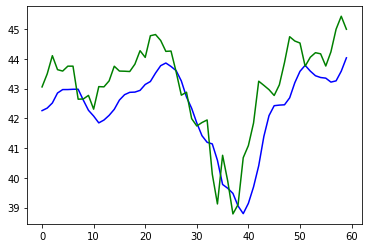

In [16]:
t=range(0,60,1)
plt.plot(t,predictions, 'b',t,y_test, 'g' )

#a
 evaluate the LSTM in terms of different timestep, using rmse of trainset and testset, and interpert the overfiting. 

#b
 what is the optimal time step? 



## redo lstm for aapl stock using multiple input-single out scheme 

In [17]:
dataset=data['Close']
dataset.shape

(300,)

In [18]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train = dataset[0:train_size]
test=dataset[train_size:len(dataset)]


In [19]:
def partition_dataset(steps, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(steps, data_len):
        x.append(data[i-steps:i])  
        y.append(data[i])  
    # Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y 


In [20]:
# Generate training data and test data
import numpy as np
x_train, y_train = partition_dataset(3, train)
x_test, y_test = partition_dataset(3, test)
x_train.shape
 

(207, 3)

In [21]:
trainX = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
testX = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
testX.shape

(87, 3, 1)

In [22]:
# Configure the neural network model
epochs = 12; batch_size = 1;

 
n_neurons=10    # hidden nodes 
model = Sequential()
model.add(LSTM(n_neurons, return_sequences=False, input_shape=(x_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/12
207/207 [==============================] - 2s 3ms/step - loss: 1309.6029
Epoch 2/12
207/207 [==============================] - 1s 3ms/step - loss: 980.7407
Epoch 3/12
207/207 [==============================] - 1s 3ms/step - loss: 822.9468
Epoch 4/12
207/207 [==============================] - 1s 3ms/step - loss: 706.7898
Epoch 5/12
207/207 [==============================] - 1s 3ms/step - loss: 607.3823
Epoch 6/12
207/207 [==============================] - 1s 2ms/step - loss: 520.3368
Epoch 7/12
207/207 [==============================] - 1s 2ms/step - loss: 443.5756
Epoch 8/12
207/207 [==============================] - 1s 3ms/step - loss: 375.8938
Epoch 9/12
207/207 [==============================] - 1s 3ms/step - loss: 316.3629
Epoch 10/12
207/207 [==============================] - 1s 3ms/step - loss: 264.1845
Epoch 11/12
207/207 [==============================] - 1s 3ms/step - loss: 218.6931
Epoch 12/12
207/207 [==============================] - 1s 3ms/step - loss: 179.3461


In [23]:

# Get the predicted values
predictions = model.predict(testX)
predictions = mmscaler.inverse_transform(predictions)
  
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
 
print('rmse: ' + str(round(rmse, 2)))

# Get the predicted values
tpredictions = model.predict(trainX)
tpredictions = mmscaler.inverse_transform(tpredictions)
  
trmse = np.sqrt(np.mean(tpredictions - y_train) ** 2)
 
print('trmse: ' + str(round(trmse, 2)))

rmse: 385.33
trmse: 391.68
